In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df0 = pd.read_csv('Bitcoin Tweets.csv')
df0

C:\Users\felip\AppData\Local\Temp\ipykernel_7036\3295968488.py:1: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('Bitcoin Tweets.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029113,Xannyx Airdrops,NaN,@pandagirltoken,2021-08-03 12:50:28,108.0,632.0,580.0,False,2022-04-17 18:43:13,@Poloniex you heard about pandacoin? The only ...,"['pandagirl', 'nft', 'nftart', 'giveaway', 'BT...",Twitter for Android,False
3029114,Gangsta monkey,NaN,#nft #cro #crofam #nfts #opensea #btc #eth,2020-09-01 13:24:09,1658.0,3079.0,4689.0,False,2022-04-17 18:43:12,https://t.co/48ON3490ju\nfriends the new airdo...,"['BTC', 'Ethereum', 'AirdropCrypto', 'crypto',...",Twitter Web App,False
3029115,Pikachu,NaN,My bio no one can understand 🤫 #CRO,2021-05-02 15:33:12,20.0,213.0,222.0,False,2022-04-17 18:43:10,@OfficialTravlad Biggest easter Egg giveaway s...,"['BNB', 'BSC', 'NFT', 'NFTCommunity', 'bsCGems...",Twitter for Android,False
3029116,🅱️🅰️🆃🅼🅰️🅽 ®️,NaN,Shift Token Visuals📸\n\n🇸 🇭 🇮 🇫 🇹 🇹 🇴 🇰 🇪 🇳,2008-10-29 00:42:25,125.0,175.0,2902.0,False,2022-04-17 18:43:09,@TheMoonCarl 🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT ...,"['SHIFT', 'SHIFTFIT', 'SHIFTNATION', 'SHIFTAPP...",Twitter for Android,False


In [3]:
#amostra de 20.000
txt_df=df0[['text']][0:20000]
txt_df

,text
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
2,"Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...
...,...
19995,⬇️⬇️ $BTC SELLING PRESSURE ALERT 📉 Price tradi...
19996,@HusseinChindo @kayodebakre8 Wrong! #Bitcoin i...
19997,LINK IN MY BIO!!! \nFlex is dropping officiall...
19998,#Bitcoin #Btc\n\nWait and see.... https://t.co...


In [4]:
def tweet_to_words(tweet):
# Tratando e convertendo texto dos tweets em sequencias de palavras
    
    # minusculas
    text = tweet.lower()
    # caracteres especiais
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenização
    words = text.split()
    # stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # aplicando redução de pavras (stemming)
    words = [PorterStemmer().stem(w) for w in words]
    
    return words

In [5]:
cleantext=[]
for item in tqdm(txt_df['text']):
    words=tweet_to_words(item)
    cleantext+=[words]
txt_df['cleantext']=cleantext
txt_df

100%|██████████| 20000/20000 [01:56<00:00, 171.44it/s]


,text,cleantext
0,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
1,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl..."
2,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh..."
3,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ..."
4,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi..."
...,...,...
19995,⬇️⬇️ $BTC SELLING PRESSURE ALERT 📉 Price tradi...,"[btc, sell, pressur, alert, price, trade, arou..."
19996,@HusseinChindo @kayodebakre8 Wrong! #Bitcoin i...,"[husseinchindo, kayodebakre8, wrong, bitcoin, ..."
19997,LINK IN MY BIO!!! \nFlex is dropping officiall...,"[link, bio, flex, drop, offici, tomorrow, feb,..."
19998,#Bitcoin #Btc\n\nWait and see.... https://t.co...,"[bitcoin, btc, wait, see, http, co, vdaseguhlp]"


# Aplicando processamento em cada tweet

In [6]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [7]:
txt_df2 = compute_vader_scores(txt_df,'cleantext')
txt_df2
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

,text,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,...",0.000,0.872,0.128,0.2960,blue ridg bank share halt nyse bitcoin atm ann...
1,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl...",0.000,0.775,0.225,0.4939,today thursday take 2 friend leowandersleb btc...
2,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh...",0.000,0.719,0.281,0.5719,guy even read articl btc would like share http...
3,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ...",0.000,1.000,0.000,0.0000,btc big chanc billion price 4872644 0 2021 02 ...
4,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi...",0.200,0.800,0.000,-0.5423,network secur 9 508 node today soon biggest be...
...,...,...,...,...,...,...,...
19995,⬇️⬇️ $BTC SELLING PRESSURE ALERT 📉 Price tradi...,"[btc, sell, pressur, alert, price, trade, arou...",0.000,0.855,0.145,0.2960,btc sell pressur alert price trade around 3782...
19996,@HusseinChindo @kayodebakre8 Wrong! #Bitcoin i...,"[husseinchindo, kayodebakre8, wrong, bitcoin, ...",0.165,0.638,0.197,-0.1027,husseinchindo kayodebakre8 wrong bitcoin legal...
19997,LINK IN MY BIO!!! \nFlex is dropping officiall...,"[link, bio, flex, drop, offici, tomorrow, feb,...",0.130,0.870,0.000,-0.2732,link bio flex drop offici tomorrow feb 06 2021...
19998,#Bitcoin #Btc\n\nWait and see.... https://t.co...,"[bitcoin, btc, wait, see, http, co, vdaseguhlp]",0.000,1.000,0.000,0.0000,bitcoin btc wait see http co vdaseguhlp


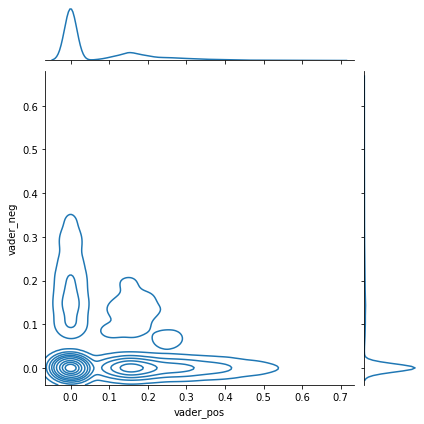

In [8]:
sns.jointplot(data=txt_df2, x='vader_pos', y='vader_neg', kind="kde")

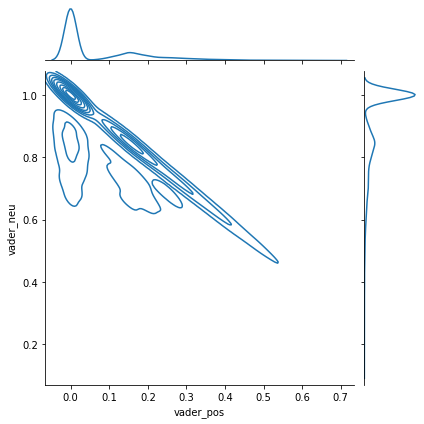

In [9]:
sns.jointplot(data=txt_df2, x='vader_pos', y='vader_neu', kind="kde")

In [10]:
class0=[]
for i in range(len(txt_df2)):
    if txt_df2.loc[i,'vader_neg']>0:
        class0+=[0]
    elif txt_df2.loc[i,'vader_pos']>0:
        class0+=[2]        
    else:
        class0+=[1]

In [11]:
txt_df['class']=class0
txt_df['class'].value_counts()

1    11246
2     6079
0     2675
Name: class, dtype: int64

def tokenize_pad_sequences(text):

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', txt_df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(txt_df['cleantext2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 blue ridg bank share halt nyse bitcoin atm announc http co xaazmajkiv myblueridgebank http co sgbxmkp1si 
After Tokenization & Padding 
 [1399 1804  254  406 3652 2760    3 1149  259    2    1    2    1    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [13]:
X.shape

(20000, 50)

In [14]:
y = pd.get_dummies(txt_df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (12000, 50) (12000, 3)
Validation Set:  (4000, 50) (4000, 3)
Test Set:  (4000, 50) (4000, 3)


In [15]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [21]:
vocab_size = 5000
embedding_size = 32
epochs = 10
lr = 0.1
decay_rate = lr / epochs
momentum = 0.8

Model

In [22]:
sgd = SGD(learning_rate=lr, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

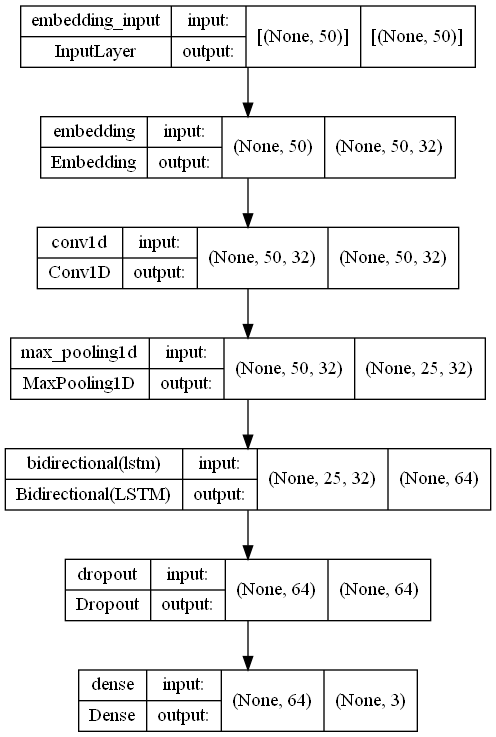

In [23]:
import tensorflow as tf
#from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [25]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
188/188 [==============================] - 8s 20ms/step - loss: 0.9580 - accuracy: 0.5626 - precision: 0.5640 - recall: 0.5411 - val_loss: 0.9510 - val_accuracy: 0.5663 - val_precision: 0.5663 - val_recall: 0.5663
Epoch 2/10
188/188 [==============================] - 3s 14ms/step - loss: 0.9485 - accuracy: 0.5648 - precision: 0.5654 - recall: 0.5624 - val_loss: 0.9454 - val_accuracy: 0.5663 - val_precision: 0.5663 - val_recall: 0.5663
Epoch 3/10
188/188 [==============================] - 2s 13ms/step - loss: 0.9381 - accuracy: 0.5648 - precision: 0.5665 - recall: 0.5623 - val_loss: 0.9306 - val_accuracy: 0.5663 - val_precision: 0.5663 - val_recall: 0.5663
Epoch 4/10
188/188 [==============================] - 2s 13ms/step - loss: 0.9183 - accuracy: 0.5655 - precision: 0.5967 - recall: 0.5275 - val_loss: 0.9069 - val_accuracy: 0.5677 - val_precision: 0.6351 - val_recall: 0.4735
Epoch 5/10
188/188 [==============================] - 3s 13ms/step - loss: 0.8878 - accuracy: 0.5835

Avaliando o modelo

In [26]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6447
Precision : 0.7371
Recall    : 0.5040
F1 Score  : 0.5987


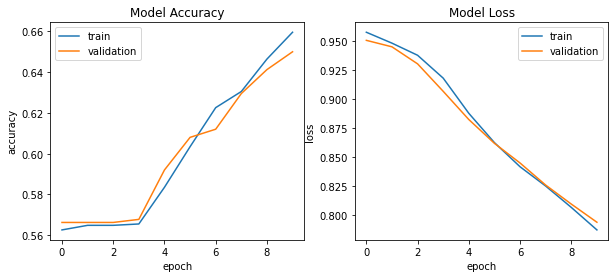

In [27]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1    2203
2    1251
0     546
dtype: int64
1    2635
2    1365
dtype: int64


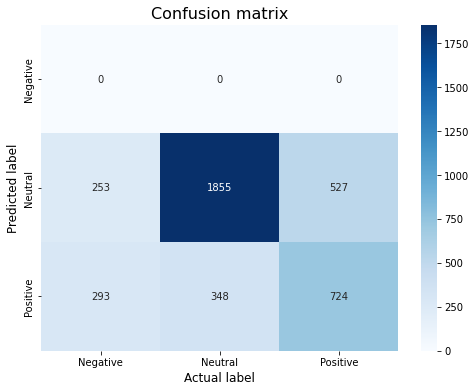

In [28]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)